In [88]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew

In [89]:
df_sales= pd.read_csv("C:\\Users\\k in g\\Downloads\\Superstore Sales Dataset.csv")

In [90]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [91]:
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [92]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'] , format='%d/%m/%Y')
df_sales['Month'] = df_sales['Order Date'].dt.month_name()
df_sales['Year'] = df_sales['Order Date'].dt.year

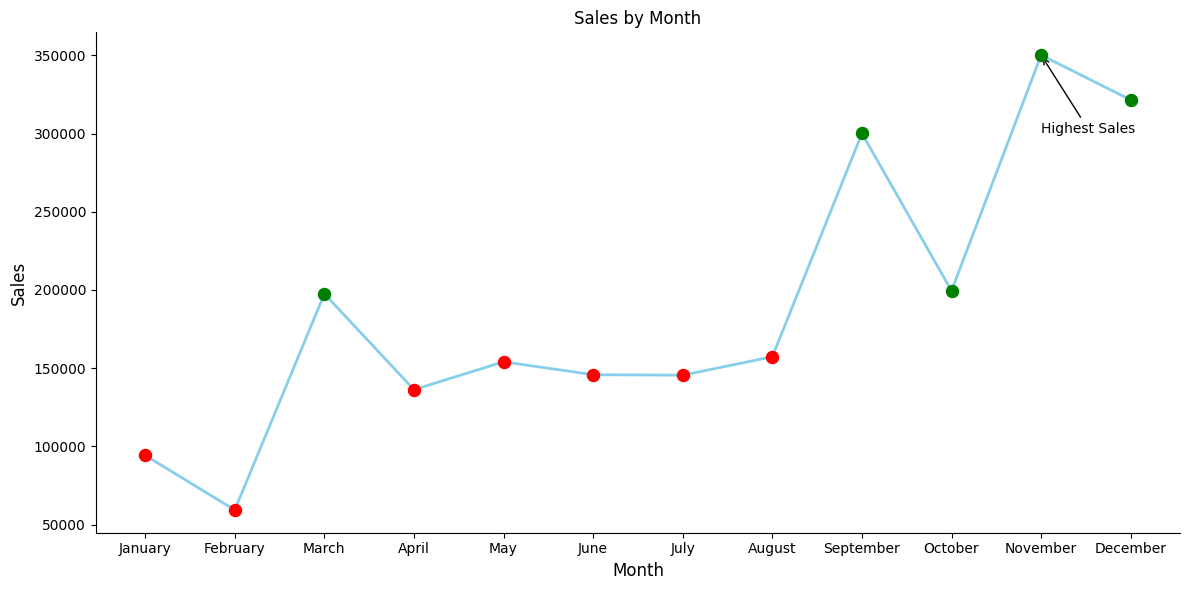

In [93]:
monthly_sales = df_sales.groupby('Month')['Sales'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

##line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], linestyle='-', color='skyblue', linewidth=2)

for x, y in zip(monthly_sales['Month'], monthly_sales['Sales']):
    color = 'red' if y <= monthly_sales['Sales'].mean() else 'green'
    plt.scatter(x, y, color=color, s=75, zorder=5) 

plt.annotate('Highest Sales' , xy=(monthly_sales['Month'][monthly_sales['Sales'].idxmax()], monthly_sales['Sales'].max()),
             xytext=(monthly_sales['Month'][monthly_sales['Sales'].idxmax()], monthly_sales['Sales'].max() - 50000),
             arrowprops=dict(facecolor='green', arrowstyle='->'))
plt.title('Sales by Month')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()



### **Sales Performance Insights**

1. **November recorded the highest sales** throughout the years , marking it as the peak month for performance

2. **February had the lowest sales**, indicating a significant drop in customer activity during this period

3. The last four months of the year **(September to December) consistently account for the majority of annual sales**, highlighting their critical importance to the business

4. An unusually high sales increase was observed in **March**, primarily driven by a single large customer order totaling **22.6K, This is considered an anomaly and not reflective of a seasonal trend**

5. Summer months show a noticeable decline in sales, suggesting the need to **introduce or enhance summer-specific products to boost performance during this period**



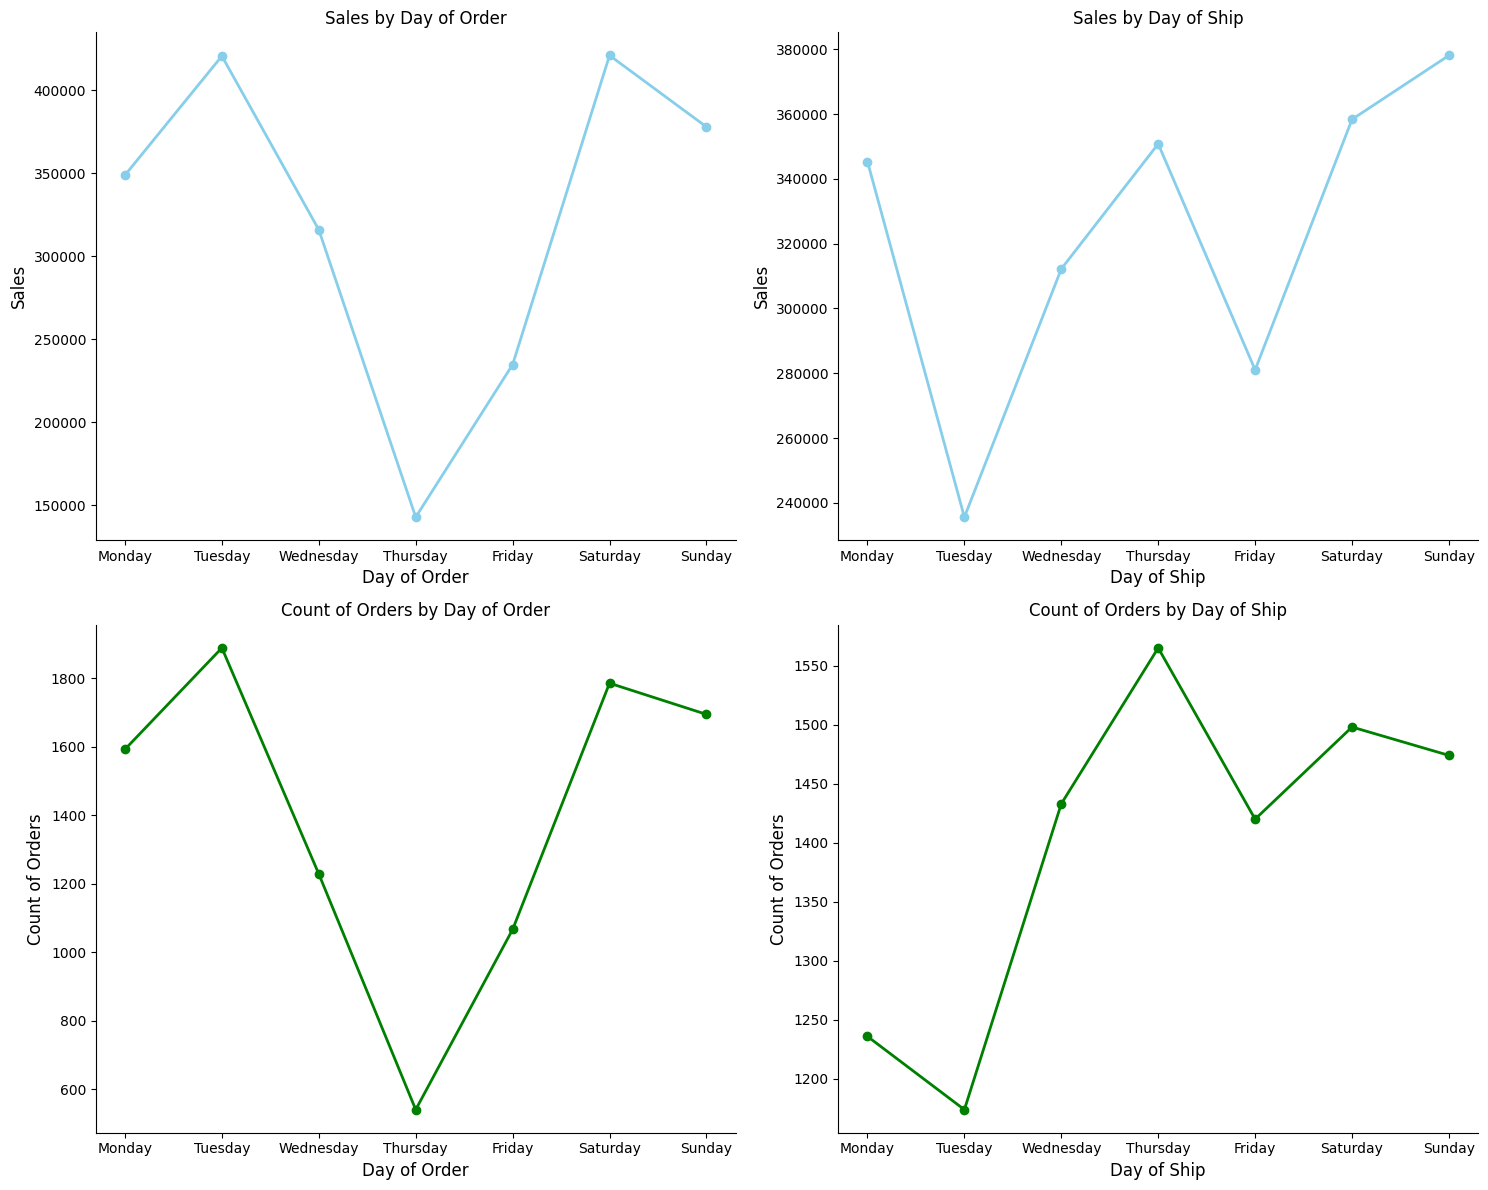

In [94]:
Day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping sales by day of order and ship 

df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'] , format='%d/%m/%Y')
df_sales['Day Order'] = df_sales['Order Date'].dt.day_name()

Day_salesOrder= df_sales.groupby('Day Order')['Sales'].sum().reset_index()
Day_salesOrder['Day Order'] = pd.Categorical(Day_salesOrder['Day Order'], categories=Day_order, ordered=True)
Day_salesOrder = Day_salesOrder.sort_values('Day Order')


df_sales['Ship Date'] = pd.to_datetime(df_sales['Ship Date'] , format='%d/%m/%Y')
df_sales['Day Ship'] = df_sales['Ship Date'].dt.day_name()

Day_salesShip= df_sales.groupby('Day Ship')['Sales'].sum().reset_index()
Day_salesShip['Day Ship'] = pd.Categorical(Day_salesShip['Day Ship'], categories=Day_order, ordered=True)
Day_salesShip = Day_salesShip.sort_values('Day Ship')

# counting sales by day of order and ship

Day_countOrder= df_sales.groupby('Day Order')['Order ID'].count().reset_index()
Day_countOrder['Day Order'] = pd.Categorical(Day_countOrder['Day Order'], categories=Day_order, ordered=True)
Day_countOrder = Day_countOrder.sort_values('Day Order')



Day_countShip= df_sales.groupby('Day Ship')['Order ID'].count().reset_index()
Day_countShip['Day Ship'] = pd.Categorical(Day_countShip['Day Ship'], categories=Day_order, ordered=True)
Day_countShip = Day_countShip.sort_values('Day Ship')


fig , axs = plt.subplots(2,2, figsize=(15 , 12))
axs[0 , 0 ].plot(Day_salesOrder['Day Order'], Day_salesOrder['Sales'], linestyle='-', color='skyblue', marker='o', linewidth=2) 
axs[0 , 0 ].set_title('Sales by Day of Order')
axs[0 , 0 ].set_xlabel('Day of Order', fontsize=12) 
axs[0 , 0 ].set_ylabel('Sales', fontsize=12)

axs[0 , 1].plot(Day_salesShip['Day Ship'], Day_salesShip['Sales'], linestyle='-', color='skyblue', marker='o', linewidth=2)
axs[0 , 1].set_title('Sales by Day of Ship')
axs[0 , 1].set_xlabel('Day of Ship', fontsize=12)
axs[0 , 1].set_ylabel('Sales', fontsize=12)

axs[1 , 0].plot(Day_countOrder['Day Order'], Day_countOrder['Order ID'], color='green' , marker='o', linewidth=2)
axs[1 , 0].set_title('Count of Orders by Day of Order')
axs[1 , 0].set_xlabel('Day of Order', fontsize=12)
axs[1 , 0].set_ylabel('Count of Orders', fontsize=12)

axs[1 , 1].plot(Day_countShip['Day Ship'], Day_countShip['Order ID'], color='green' , marker='o', linewidth=2)
axs[1 , 1].set_title('Count of Orders by Day of Ship')
axs[1 , 1].set_xlabel('Day of Ship', fontsize=12)
axs[1 , 1].set_ylabel('Count of Orders', fontsize=12)


for ax_row in axs:
	for ax in ax_row:
		ax.spines['top'].set_visible(False)
		ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### **Operational Insights Based on Daily Order & Shipping Patterns**

1. **Thursdays** show a relatively **low number of orders**, yet they record the **highest number of shipments**.

2. **Mondays and Tuesdays** receive the **highest number of orders**, while **shipping activity remains comparatively low**.

3. **Saturdays and Sundays** consistently record both a **high number of orders and deliveries**, including some of the **most valuable orders**.

---

### **Recommendations**

- **Introduce promotional offers or targeted campaigns on Thursdays** to boost order volume and align demand with shipping capacity.
  
- **Optimize system and server performance on Mondays and Tuesdays** to handle peak ordering activity smoothly and avoid potential failures or delays.
  
- **Ensure sufficient weekend operational resources** (staff, logistics, support) are in place to sustain high order volume and maintain service quality, especially for **high-value deliveries**.


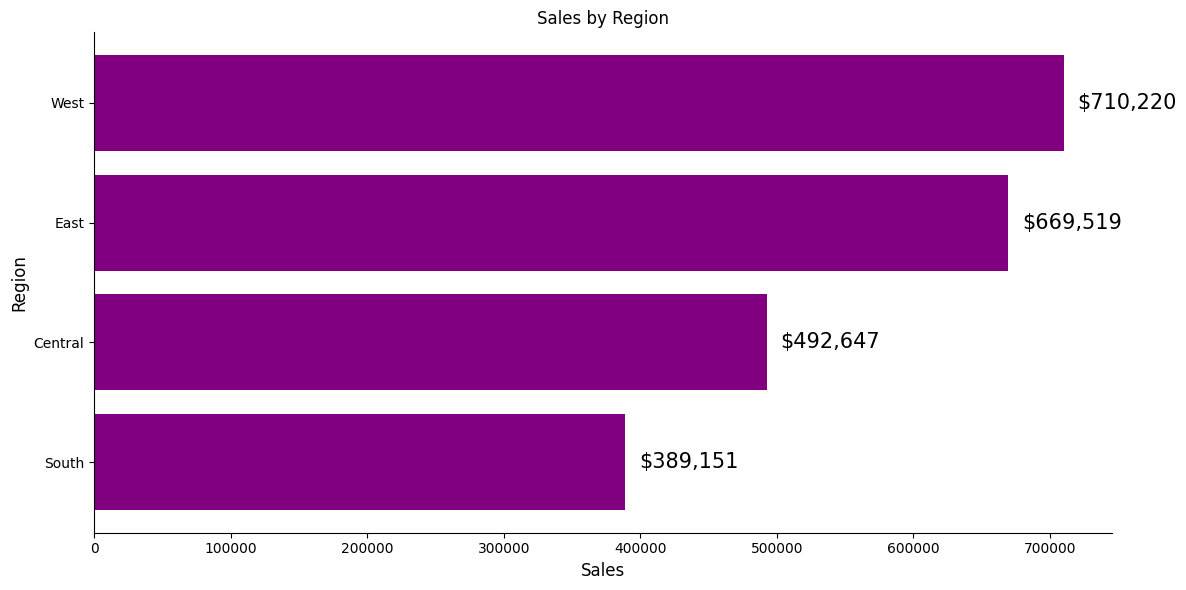

In [95]:
##Bar plot
plt.figure(figsize=(12, 6))
Region_Sales = df_sales.groupby('Region')['Sales'].sum().reset_index()
df_sorted = Region_Sales.sort_values('Sales', ascending=True)
plt.barh(df_sorted['Region'], df_sorted['Sales'], color='purple')
plt.title('Sales by Region')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Region', fontsize=12)
for i, value in enumerate(df_sorted['Sales']):
    formatted_value = '${:,.0f}'.format(value)
    plt.text(value + 10000, df_sorted['Region'].iloc[i], formatted_value, ha='left', va='center', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**The West region recorded the highest sales, while both the South and Central regions showed the lowest** ,
**Targeted advertising and promotional offers in these areas are recommended to increase market reach**

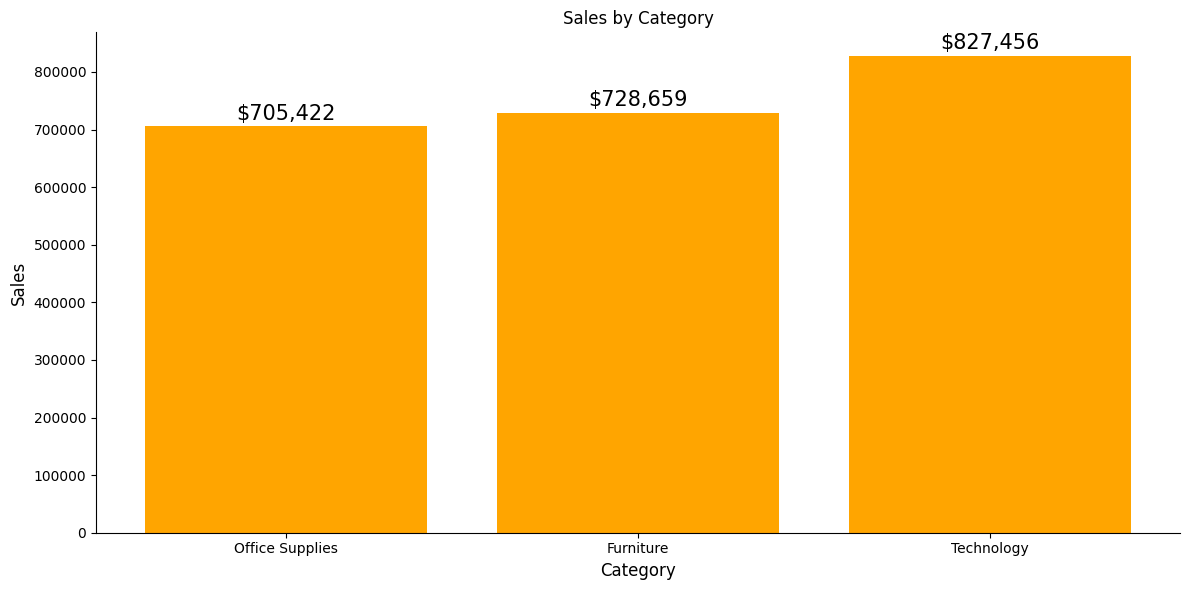

In [96]:
#Column plot
plt.figure(figsize=(12, 6))
Category_sales = df_sales.groupby('Category')['Sales'].sum().reset_index()
df_sorted = Category_sales.sort_values('Sales', ascending=True).reset_index(drop=True)
plt.bar(df_sorted['Category'], df_sorted['Sales'], color='orange')
plt.title('Sales by Category')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
for i, value in enumerate(df_sorted['Sales']):
    formatted_value = '${:,.0f}'.format(value)
    plt.text(df_sorted['Category'][i], df_sorted['Sales'][i] + 5000, formatted_value, ha='center', va='bottom', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Technology generated the highest sales**, followed by **Furniture, while Office Supplies** recorded the lowest

Consider enhancing promotions for Office Supplies to **improve visibility and competitiveness in this lower-performing category**



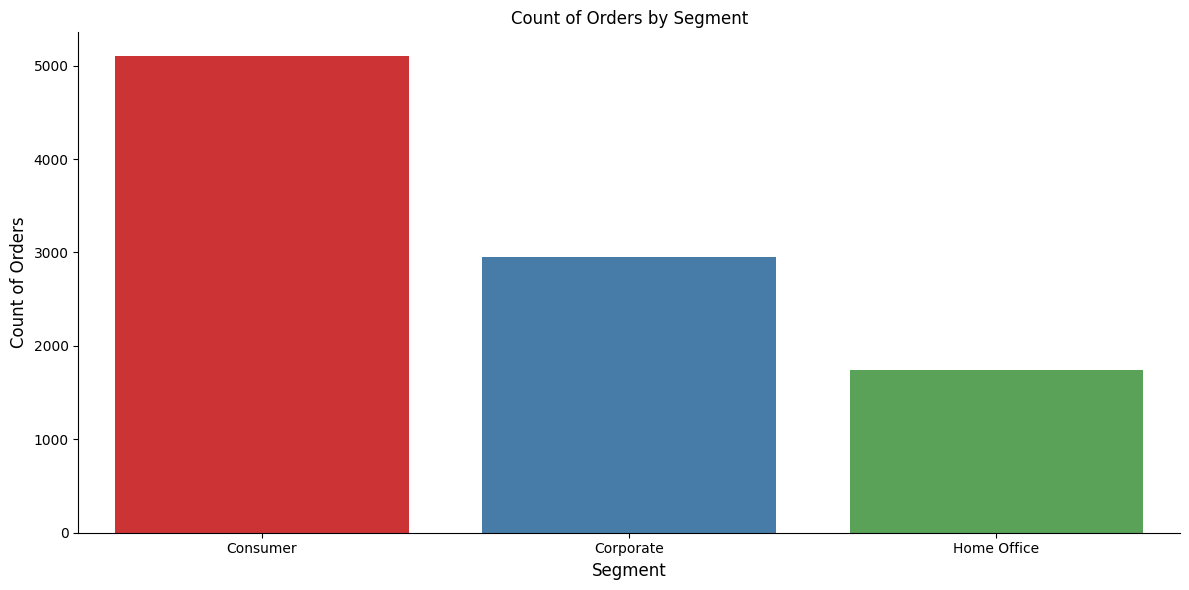

In [97]:
# count plot -> sns
plt.figure(figsize=(12, 6))
sns.countplot(x='Segment', data=df_sales , hue='Segment', palette='Set1')
plt.title('Count of Orders by Segment')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()  

**The Consumer segment recorded the highest number of orders, significantly surpassing both the Corporate and Home Office segments**  
**This indicates a strong orders from the Consumer segment, suggesting the need to prioritize and expand product offerings tailored to this group**


([<matplotlib.patches.Wedge at 0x22120eeb4d0>,
 [Text(1.0060356595454243, -0.44485081962721323, 'Office Supplies'),
  Text(-0.00551101725990888, 1.0999861947718985, 'Furniture'),
  Text(-0.9104235980982013, -0.6173563574030199, 'Technology')],
 [Text(0.5487467233884131, -0.24264590161484356, '31.2%'),
  Text(-0.0030060094144957524, 0.599992469875581, '32.2%'),
  Text(-0.49659468987174604, -0.33673983131073804, '36.6%')])

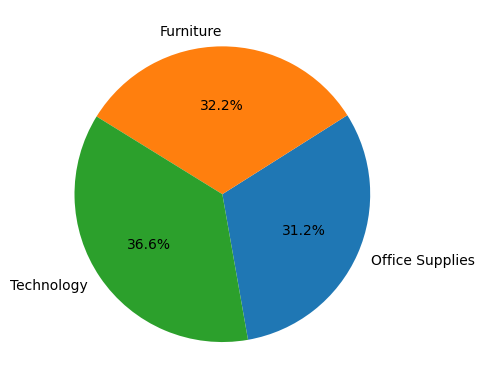

In [98]:
# pie plot
plt.pie(df_sorted['Sales'], labels=df_sorted['Category'].unique(), autopct='%1.1f%%', startangle=1360)

In [99]:
df_grouped = df_sales.groupby(['Month', 'Category'], as_index=False)['Sales'].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_grouped['Month'] = pd.Categorical(df_grouped['Month'], categories=month_order, ordered=True)
df_grouped = df_grouped.sort_values('Month')

In [100]:
Year_Sales = df_sales.groupby('Year')['Sales'].sum().reset_index()
Year_Sales = Year_Sales.sort_values('Year')

fig = make_subplots(rows=1, cols=2, subplot_titles=('Sales by Year', 'Sales by Month'))
fig.add_trace(
    go.Scatter(x=Year_Sales['Year'], y=Year_Sales['Sales'], mode='lines+markers', name='Sales by Year'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=monthly_sales['Month'], y=monthly_sales['Sales'], mode='lines+markers', name='Sales by Month'),
    row=1, col=2
)
fig.update_layout(title_text='Sales Analysis', height=600, width=1300)
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_xaxes(title_text='Month', row=1, col=2)
fig.update_yaxes(title_text='Sales', row=1, col=1)
fig.update_yaxes(title_text='Sales', row=1, col=2)
fig.show()

In [101]:
# interactive Time Series Plot -> plotly

fig = px.line(df_grouped, 
              x='Month', 
              y='Sales', 
              color='Category',
              title='Interactive Time Series Plot of Sales',
              labels={'Month': 'Order Date', 'Sales': 'Total Sales'})

fig.update_traces(
    mode='lines+markers',
    line=dict(width=2),
    marker=dict(symbol='circle', size=7)
)

mean_sales = df_grouped['Sales'].mean()

fig.add_shape(
    type='line',
    x0=df_grouped['Month'].min(),   
    x1=df_grouped['Month'].max(),   
    y0=mean_sales,
    y1=mean_sales,
    line=dict(color='black', width=2, dash='dash'),  
)

fig.add_annotation(
    x=df_grouped['Month'].iloc[len(df_grouped) // 2],  
    y=mean_sales,
    text=f"Avg Sales: {mean_sales:.2f}",
    showarrow=False,
    font=dict(color='black', size=12),
    bgcolor='white'
)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(template='plotly_white')
fig.show()


### **Time Series Insights**

- **Technology** consistently generates the highest total sales, especially in **March, November, and December**

- **November** shows the **peak in sales**, nearing **130K**, well above the average line (~62.8K), reaffirming Technology as the **leading revenue driver**

- **Furniture** and **Office Supplies** show comparable trends in total sales, often hovering around or below the average

- Sales across all categories peak during **November and December**, highlighting **Q4** as the **most critical revenue-generating period** of the year

- **February** records the **lowest sales totals** across all categories, making it the weakest performing month — potentially a result of **seasonal behavior** or **reduced consumer activity**

---

### **Recommendations Based on Sales Trends**

- Focus marketing and sales efforts heavily in **Q4**, especially on **Technology products**, to capitalize on historically strong demand

- **Strengthen promotional activity** for **Furniture** and **Office Supplies**, particularly during mid-year and low-demand months

- Introduce **targeted campaigns in February** to offset the annual dip in sales and increase engagement during the **slow season**
 


In [102]:
# Choropleth Map

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
df_sales['State'] = df_sales['State'].map(state_abbrev)
Sales_Total = df_sales.groupby('State')['Sales'].sum().reset_index()


Sales_State = df_sales.groupby(['State', 'Year'])['Sales'].sum().reset_index()
Sales_State = Sales_State.sort_values(['State', 'Year'], ascending=[True, True]).reset_index(drop=True)

fig = px.choropleth(Sales_State, locations='State', locationmode='USA-states', color='Sales', scope='usa',
    title='Sales by State in the USA', color_continuous_scale='Blues', animation_frame='Year')

fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'Show 2015',
                    'method': 'update',
                    'args': [{'locations': [Sales_State[Sales_State['Year'] == 2015]['State']],
                              'z': [Sales_State[Sales_State['Year'] == 2015]['Sales']]}]
                },
                {
                    'label': 'Show 2018',
                    'method': 'update',
                    'args': [{'locations': [Sales_State[Sales_State['Year'] == 2018]['State']],
                              'z': [Sales_State[Sales_State['Year'] == 2018]['Sales']]}]
                },
                {
                    'label': 'Show Total Sales',
                    'method': 'update',
                    'args': [{'locations': [Sales_Total['State']],
                    'z': [Sales_Total['Sales']]}]
                },],
            'direction': 'down',
            'showactive': True,
        }
    ] , title_x=0.5, title_font=dict(size=20)
)



fig.show()

############################################################################################################################

# Interactive Choropleth Map with Plotly

Orders_Total = df_sales.groupby('State')['Order ID'].count().reset_index()
Orders_Total.rename(columns={'Order ID': 'Order_Count'}, inplace=True)

Orders_State = df_sales.groupby(['State', 'Year'])['Order ID'].count().reset_index()
Orders_State.rename(columns={'Order ID': 'Order_Count'}, inplace=True)

fig = go.Figure()

fig.add_trace(go.Choropleth(locations=Orders_Total['State'],z=Orders_Total['Order_Count'],locationmode='USA-states',colorscale='Blues',colorbar_title="Order Count"))

buttons = []

years = sorted(df_sales['Year'].unique())
for year in years:
    data_year = Orders_State[Orders_State['Year'] == year]
    buttons.append(dict(
        label=f'Show {year}',
        method='update',
        args=[{'z': [data_year['Order_Count']],
               'locations': [data_year['State']]}]
    ))

buttons.append(dict(
    label='Show Total Orders',
    method='update',
    args=[{'z': [Orders_Total['Order_Count']],
           'locations': [Orders_Total['State']]}]
))

fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
        )
    ],
    title_text='Order Count by State in USA',
    geo_scope='usa'
)

fig.show()




### **Geographical Sales Insights**

- **California**, **New York**, **Washington**, and **Texas** are the **top-performing states** in terms of total sales, with **California leading significantly**.

- Other states contribute **marginally**, with most recording **sales below 20K**, indicating a **highly concentrated market presence** in only a few regions.

---

### **Recommendations**

- **Maintain strong engagement and inventory focus** in high-performing states such as **California, New York, Texas, and Washington**, as they generate the majority of revenue and order volume.

- **Explore expansion strategies** or **localized marketing efforts** in underperforming states to increase **brand visibility** and unlock **untapped potential**.

- Consider conducting a **market segmentation analysis** to understand why performance is weak in certain regions and whether it's due to **low demand**, **lack of reach**, or **operational limitations**.


12.98149551275044


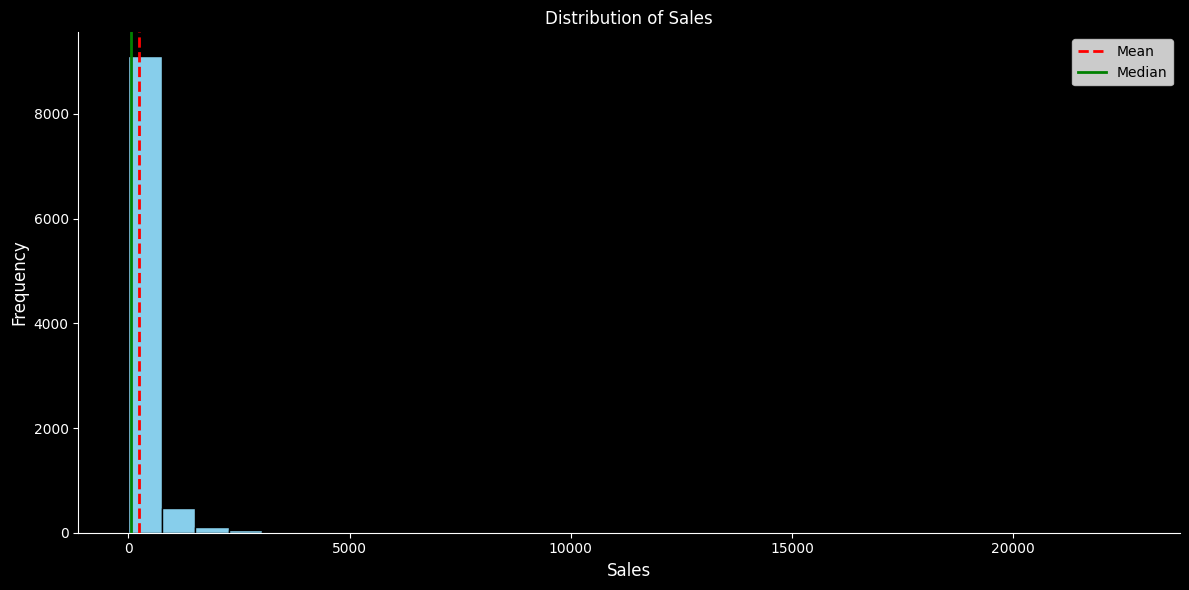

In [103]:
skewness_value = skew(df_sales['Sales'])
print(skewness_value)
#Histogram plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 6))
    plt.hist(df_sales['Sales'], bins=30, color='skyblue', edgecolor='black')

mean_value = np.mean(df_sales['Sales'])
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label='Mean') 

median_value = np.median(df_sales['Sales'])
plt.axvline(median_value, color='green', linestyle='-', linewidth=2, label='Median')

plt.title('Distribution of Sales')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


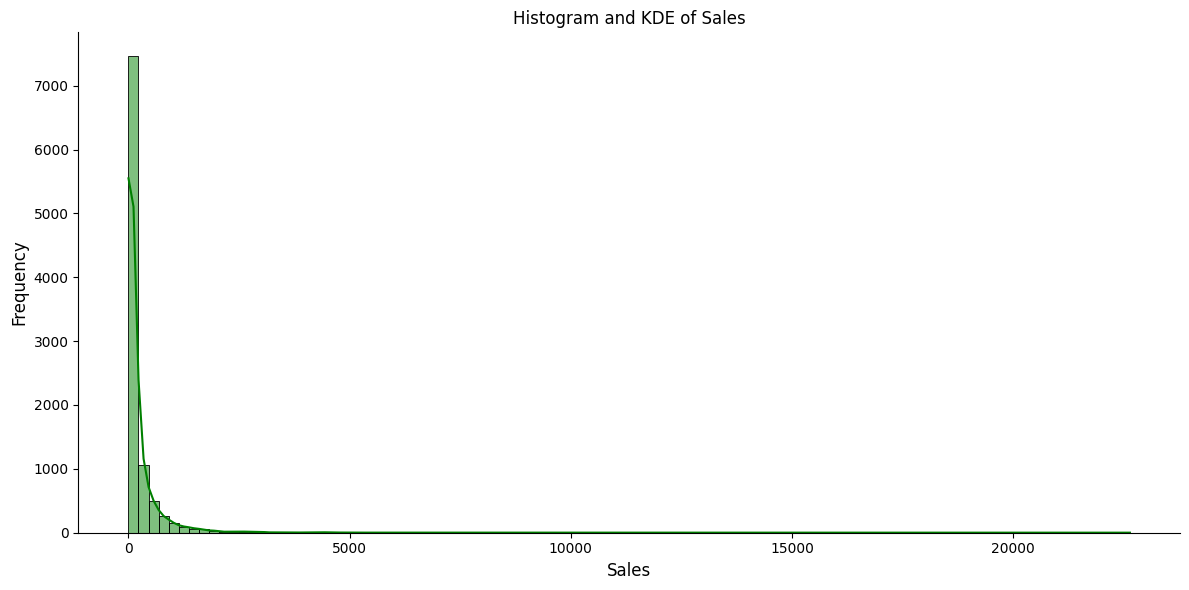

In [104]:
# Histogram  and KDE plot  -> sns 
plt.figure(figsize=(12, 6))
sns.histplot(df_sales['Sales'], bins=100, kde=True, color='green', edgecolor='black')
plt.title('Histogram and KDE of Sales')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [105]:
# interactive line plot -> plotl
fig = px.line(
    Year_Sales,
    x='Year',
    y='Sales',
    title='Interactive Sales Over Years',
    labels={'Year': 'Year', 'Sales': 'Sales'},
    markers=True
)
fig.update_traces(
    line=dict(color='skyblue', width=2),
    marker=dict(symbol='circle', size=8),
    text=Year_Sales['Sales'].apply(lambda s: f"${s:,.0f}"),
    textposition="top center"
)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Sales',
    template='plotly_dark'
)
fig.show()

In [106]:
# Animations Scatter plot
fig = px.scatter(df_sales, x='Month', y='Sales', color='Category', animation_frame='Year', animation_group='Category',
                 title='Sales by Month and Category Over Years', size='Sales', size_max=60)
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sales',
    legend_title='Category',
    template='plotly_dark'
)
fig.show()

In [107]:
# interactive Scatter plot -> plotly
fig = px.scatter(df_sales, x='Month', y='Sales', color='Category', title='Sales by Month and Category', labels={'Month': 'Month', 'Sales': 'Sales', 'Category': 'Category'})
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sales',
    legend_title='Category',
    template='plotly_dark'
)
fig.show()

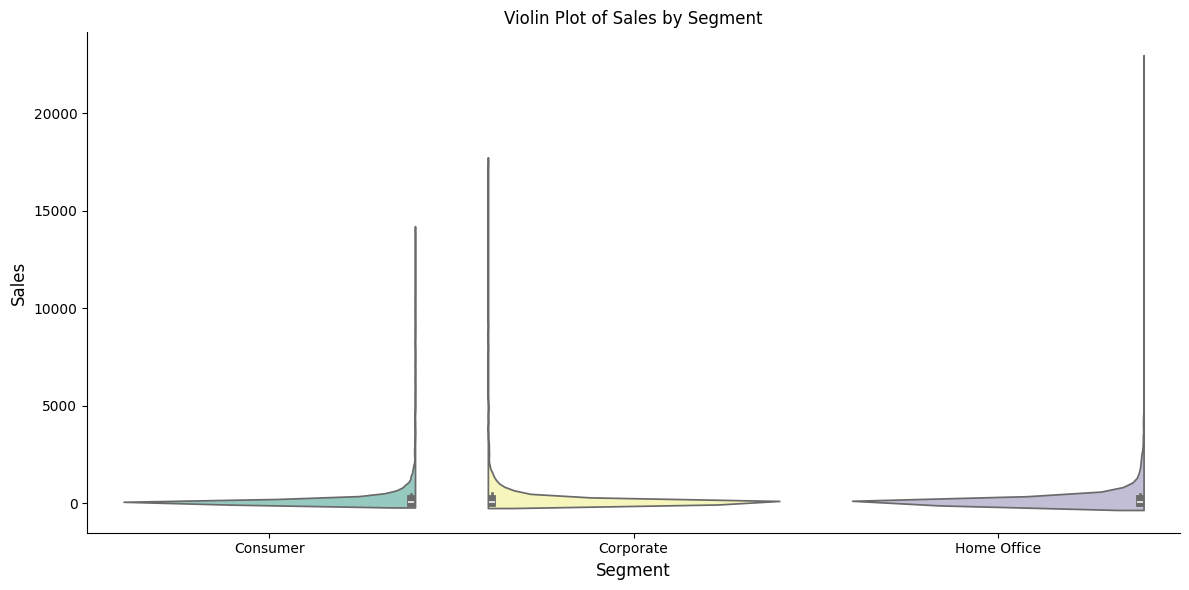

In [108]:
# violin plot -> sns
plt.figure(figsize=(12, 6))
sns.violinplot(x='Segment', y='Sales', data=df_sales, hue='Segment', split=True, palette='Set3')
plt.title('Violin Plot of Sales by Segment')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

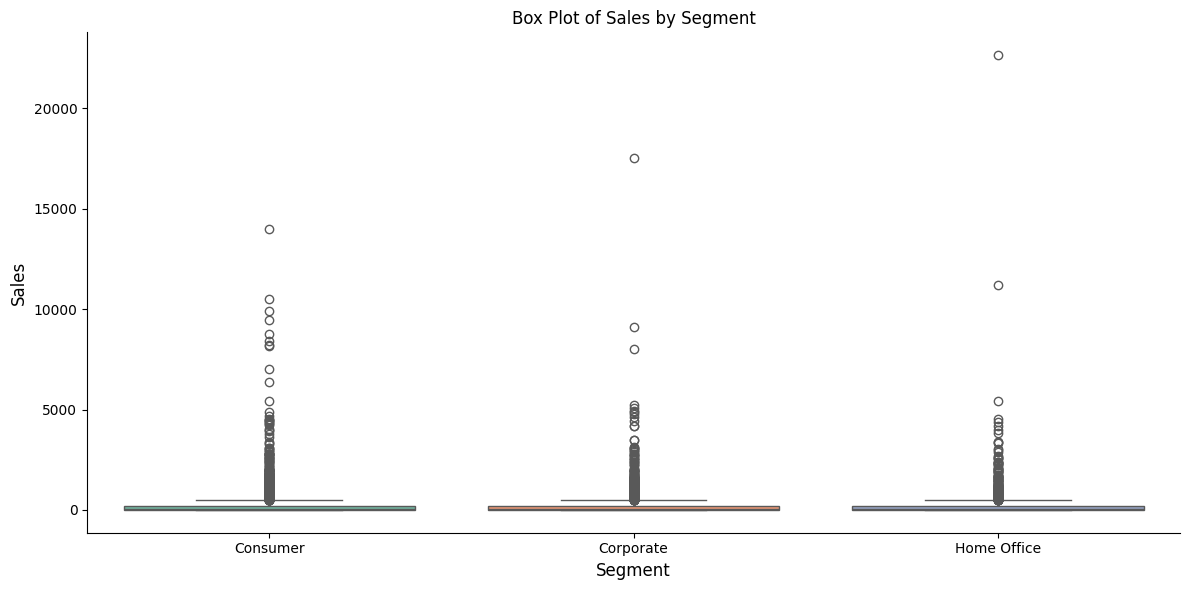

In [109]:
# Box plot -> sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Sales', data=df_sales, hue='Segment', palette='Set2', legend=False)
plt.title('Box Plot of Sales by Segment')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()